In [1]:
import polars as pl

In [2]:
!ls ../kkdata

light_test_source_labels.csv   sample.csv		train_target_events.csv
light_train_source_labels.csv  test_source_events.csv
light_train_target_labels.csv  train_source_events.csv


In [3]:
import os
os.listdir('../kkdata')

['light_train_target_labels.csv',
 'train_target_events.csv',
 'light_train_source_labels.csv',
 'train_source_events.csv',
 'light_test_source_labels.csv',
 'test_source_events.csv',
 'sample.csv']

In [4]:
from pathlib import Path
for p in Path('../kkdata').glob('*'):
    print(p)

../kkdata/light_train_target_labels.csv
../kkdata/train_target_events.csv
../kkdata/light_train_source_labels.csv
../kkdata/train_source_events.csv
../kkdata/light_test_source_labels.csv
../kkdata/test_source_events.csv
../kkdata/sample.csv


In [5]:
!ls -lah ../kkdata2

total 757M
drwxrwxr-x  2 tjw tjw 4.0K  十  11 09:59 .
drwxrwxr-x 10 tjw tjw 4.0K  十  11 09:58 ..
-rw-rw-r--  1 tjw tjw  31M  三   3  2023 light_test_source_labels.csv
-rw-rw-r--  1 tjw tjw 121M  三   3  2023 light_train_source_labels.csv
-rw-rw-r--  1 tjw tjw 3.5M  三   3  2023 light_train_target_labels.csv
-rw-rw-r--  1 tjw tjw 878K  三   3  2023 sample.csv
-rw-rw-r--  1 tjw tjw 118M  三   3  2023 test_source_events.csv
-rw-rw-r--  1 tjw tjw 467M  三   3  2023 train_source_events.csv
-rw-rw-r--  1 tjw tjw  19M  三   3  2023 train_target_events.csv


In [6]:
df_source = pl.read_csv("../kkdata/train_source_events.csv")
df_target = pl.read_csv("../kkdata/train_target_events.csv")

In [7]:
df_target.shape

(375281, 10)

In [8]:
df_source.shape

(9706783, 10)

In [9]:
df_source.columns

['user_id',
 'device_id',
 'session_id',
 'title_id',
 'event_time',
 'played_duration',
 'action_trigger',
 'platform',
 'title_in_simulcast',
 'internet_connection_type']

In [16]:
df_target.columns

['user_id',
 'device_id',
 'session_id',
 'title_id',
 'event_time',
 'played_duration',
 'action_trigger',
 'platform',
 'title_in_simulcast',
 'internet_connection_type']

In [17]:
df_target.columns == df_source.columns

True

### How many unique user id?

In [31]:
len(set(df_source['user_id']))

30460

In [18]:
len(set(df_source['user_id']))

30460

In [34]:
df_source['user_id'].unique().shape[0]

30460

In [35]:
df_target['user_id'].unique().shape[0]

30460

In [37]:
print(df_source.columns)

['user_id', 'device_id', 'session_id', 'title_id', 'event_time', 'played_duration', 'action_trigger', 'platform', 'title_in_simulcast', 'internet_connection_type']


In [43]:
df_source.describe()

describe,user_id,device_id,session_id,title_id,event_time,played_duration,action_trigger,platform,title_in_simulcast,internet_connection_type
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",9.706783e6,9.706783e6,9.706783e6,9.706783e6,9.706783e6,9.706783e6,9.706783e6,9.706783e6,9.706783e6,9.706783e6
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",15185.691892,69352.118432,2.1058e6,574.222636,1.6508e9,964.473694,1.293329,0.815712,0.400947,1.999307
"""std""",8830.878168,40308.101148,1.2173e6,806.703416,6.7705e6,2623.673569,2.461894,0.903258,0.491433,1.589054
"""min""",0.0,0.0,0.0,0.0,1.6392e9,1.0,0.0,0.0,0.0,0.0
"""25%""",7421.0,33999.0,1.049969e6,93.0,1.6444e9,60.0,0.0,0.0,0.0,1.0
"""50%""",15233.0,69000.0,2.104857e6,254.0,1.6517e9,610.0,1.0,1.0,0.0,1.0
"""75%""",22837.0,104238.0,3.159405e6,685.0,1.6568e9,1424.0,1.0,1.0,1.0,3.0
"""max""",30459.0,140490.0,4.236337e6,6098.0,1.6616e9,2.06549e6,13.0,3.0,2.0,11.0


In [10]:
df_target['event_time'].min()

1661562000.336

### How many total play time?

In [11]:
df_source['played_duration'].sum()

9361936857

### Time interval?

In [45]:
df_source['event_time'].min()

1639184401.205

In [46]:
df_source['event_time'].max()

1661561998.588

In [47]:
df_source['event_time'].describe()

statistic,value
str,f64
"""count""",9.706783e6
"""null_count""",0.0
"""mean""",1.6508e9
"""std""",6.7705e6
"""min""",1.6392e9
"""25%""",1.6444e9
"""50%""",1.6517e9
"""75%""",1.6568e9
"""max""",1.6616e9


In [54]:
(df_source['event_time'].max()-df_source['event_time'].min())/60

372959.9563833356

In [52]:
et = df_source['event_time']
(et.max()-et.min())/60/60/24/7

36.999995672949964

In [55]:
et = df_target['event_time']
(et.max()-et.min())/60/60/24/7

0.9999933746693627

In [58]:
et.max()

1662166796.329

In [59]:
import datetime
datetime.datetime.fromtimestamp(1662166796.329)

datetime.datetime(2022, 9, 3, 8, 59, 56, 329000)

In [ ]:
et = df_source['event_time']


In [70]:
pl.from_epoch("event_time", time_unit="s")

In [67]:
df_target[['event_time']].with_columns(
       pl.from_epoch("event_time", time_unit="s")
)

event_time
datetime[μs]
2022-08-27 05:48:49
2022-08-27 06:00:17
2022-08-27 06:03:53
2022-08-27 11:53:38
2022-08-27 12:46:42
2022-08-27 15:17:00
2022-08-27 16:08:23
2022-08-28 05:52:46
2022-08-29 06:02:26


### How many event per user?

In [14]:
df_source.group_by('user_id').count().sort(by='count')

user_id,count
i64,u32
17896,1
12496,1
22712,1
6152,1
20568,1
28544,1
15800,1
21776,1
18200,1


In [16]:
# total time by user
df_target[['user_id', 'played_duration']].group_by('user_id').sum().sort('played_duration')

user_id,played_duration
i64,i64
17200,1
28928,1
27480,1
27816,1
23505,1
4353,1
18825,1
3425,1
11458,1


In [19]:
486812/60/60/24

5.634398148148148

In [20]:
source_total = df_source[['user_id', 'played_duration']].group_by('user_id').sum()
target_total = df_target[['user_id', 'played_duration']].group_by('user_id').sum()

In [21]:
df_total = source_total.join(target_total, on='user_id')
df_total

user_id,played_duration,played_duration_right
i64,i64,i64
240,490381,25810
30320,17675,452
5872,661981,24185
13704,30621,18999
5368,172815,37174
26056,163404,2712
5160,145534,11135
11152,142027,28
20816,176112,11797


In [22]:
%matplotlib inline

In [23]:
import matplotlib.pyplot as plt

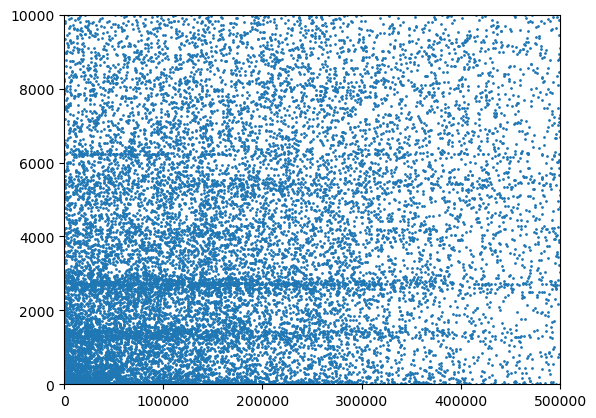

In [24]:
plt.xlim(0, 500000)
plt.ylim(0, 10000)
plt.scatter(df_total['played_duration'], df_total['played_duration_right'], s=1)

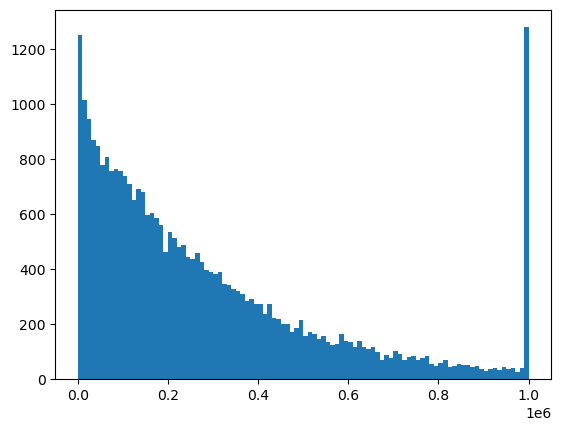

In [25]:
plt.hist(df_total['played_duration'].clip(0, 1000000), bins=100);

In [26]:
df_total.describe([0.05, 0.5, 0.95])

describe,user_id,played_duration,played_duration_right
str,f64,f64,f64
"""count""",30460.0,30460.0,30460.0
"""null_count""",0.0,0.0,0.0
"""mean""",15229.5,307351.833782,12154.442449
"""std""",8793.188936,386314.367762,18819.115984
"""min""",0.0,1.0,1.0
"""5%""",1523.0,12538.0,79.0
"""50%""",15230.0,203277.0,6178.0
"""95%""",28937.0,923121.0,43357.0
"""max""",30459.0,1.1995926e7,486812.0


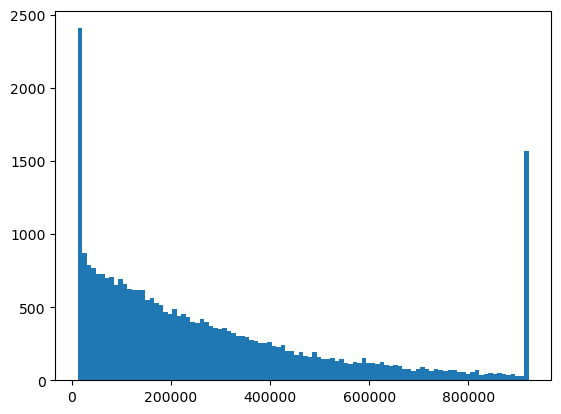

In [27]:
plt.hist(df_total['played_duration'].clip(12544,921558), bins=100);

In [28]:
(df_total['played_duration']/3600).round()

played_duration
f64
136.0
5.0
184.0
9.0
48.0
45.0
40.0
39.0
49.0


In [29]:
#df_total['played_duration_hour'] = (df_total['played_duration']/3600).round()
df_total = df_total.with_columns( played_hour = (df_total['played_duration']/3600).round())
df_total

user_id,played_duration,played_duration_right,played_hour
i64,i64,i64,f64
240,490381,25810,136.0
30320,17675,452,5.0
5872,661981,24185,184.0
13704,30621,18999,9.0
5368,172815,37174,48.0
26056,163404,2712,45.0
5160,145534,11135,40.0
11152,142027,28,39.0
20816,176112,11797,49.0


In [30]:
df_total_gb = df_total[['played_duration_right', 'played_hour']].group_by('played_hour').mean().sort('played_hour')
df_total_gb

played_hour,played_duration_right
f64,f64
0.0,7482.155063
1.0,5743.595455
2.0,6585.54386
3.0,6698.505348
4.0,6168.042781
5.0,6938.502941
6.0,6423.984985
7.0,5898.463768
8.0,6491.38806


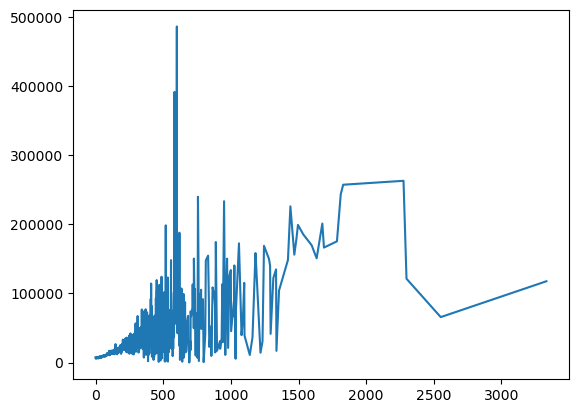

In [31]:
plt.plot(df_total_gb['played_hour'], df_total_gb['played_duration_right'])

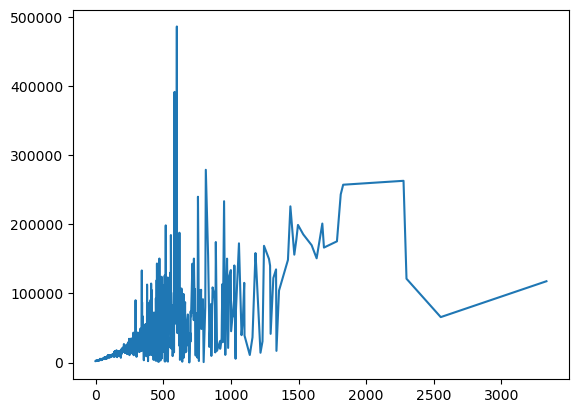

In [32]:
df_total_gb = df_total[['played_duration_right', 'played_hour']].group_by('played_hour').quantile(0.5).sort('played_hour')
plt.plot(df_total_gb['played_hour'], df_total_gb['played_duration_right'])

In [33]:
source_count = df_source.group_by('user_id').count()
target_count = df_target.group_by('user_id').count()
df_count = source_count.join(target_count, on='user_id')
df_count

user_id,count,count_right
i64,u32,u32
1024,362,19
11904,596,2
5664,577,24
23080,1528,14
25632,562,21
29112,34,5
21336,362,16
4904,180,9
1056,57,11


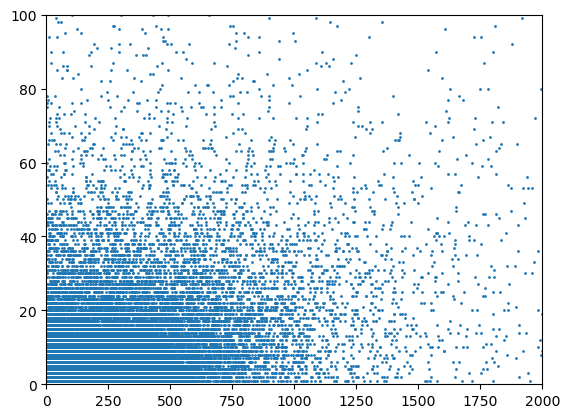

In [34]:
plt.xlim(0, 2000)
plt.ylim(0, 100)
plt.scatter(df_count['count'], df_count['count_right'], s=1)

### Similarity between users
#### How to represent a user?

In [38]:
# df_source[df_source.user_id == 0]
df_source.filter((pl.col('user_id')==0) &  (pl.col('title_id')==212))['played_duration'].sum()

289

In [ ]:
_ t1, t2, t3, t4
0  3  6   0    90
1  0  0   1     0
2
3

In [42]:
group_by_key = ["user_id", "title_id"]
df_ = df_source[group_by_key+["played_duration"]].sort(by='title_id').group_by(["user_id", "title_id"]).sum()
df_

user_id,title_id,played_duration
i64,i64,i64
0,0,21964
23,0,12160
66,0,2911
118,0,32
130,0,15941
135,0,1842
178,0,282
231,0,2251
297,0,28139


In [43]:
df_ = df_.pivot(values="played_duration", index="user_id", columns="title_id").fill_null(0)
df_

user_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,…,4698,4759,4970,4972,5035,5330,5350,5440,5459,5497,5600,5612,5616,5715,5733,5757,5762,5769,5851,5853,5862,5976,5996,6006,6012,6018,6030,6032,6044,6052,6061,6062,6068,6075,6079,6082,6086
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,…,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
0,21964,28500,22111,0,25386,0,0,22244,22500,0,0,33513,21304,0,0,0,0,0,0,0,0,0,0,0,0,0,23929,37071,0,0,0,13514,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23,12160,0,0,11264,22386,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5989,1913,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
66,2911,0,12366,2517,0,0,0,5218,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3898,0,0,0,0,1473,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
118,32,2624,3514,0,0,0,0,7766,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1554,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
130,15941,0,12744,1503,0,0,0,8391,0,0,0,0,0,0,0,0,0,0,0,0,531,0,0,0,0,0,21901,0,2634,14,0,587,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
135,1842,0,0,650,0,0,1263,820,0,0,84470,0,0,0,0,0,0,7121,0,0,0,0,0,0,0,0,0,14169,0,0,0,12675,0,2878,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
178,282,94,0,1464,0,2855,606,0,3379,0,0,0,20,0,0,0,0,0,0,0,0,0,0,0,0,5190,0,0,0,0,0,5139,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
231,2251,0,0,0,2682,0,0,80,0,0,0,20,5519,0,0,0,0,0,0,0,0,5405,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
297,28139,23293,20888,18895,13018,0,288,24561,19729,0,0,15203,55,0,0,0,0,0,0,0,1239,64378,0,0,0,0,24093,4770,0,0,0,9450,0,4122,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [44]:
A = df_[df_.columns[1:]].to_numpy()
A

array([[21964, 28500, 22111, ...,     0,     0,     0],
       [12160,     0,     0, ...,     0,     0,     0],
       [ 2911,     0, 12366, ...,     0,     0,     0],
       ...,
       [    0,     0,     0, ...,     0,     0,     0],
       [    0,     0,     0, ...,     0,     0,     0],
       [    0,     0,     0, ...,     0,     0,     0]])

In [45]:
import numpy as np
A = A / np.linalg.norm(A, axis=1, keepdims=True)
A

array([[0.20673146, 0.26825016, 0.20811506, ..., 0.        , 0.        ,
        0.        ],
       [0.06072573, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.0782258 , 0.        , 0.33230513, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [46]:
D = A[:100] @ A.T

In [47]:
np.fill_diagonal(D, 0)
D.argmax(axis=1)

array([  672,  6960, 27706, 15161, 20304, 21633, 25611, 17665, 24827,
       10786, 14166, 23537,  4032, 21527, 28134, 15483,  2327, 13644,
        1709,  6403,   948,   190, 28864, 19711,  1147, 30347, 17696,
       18511,   957, 13973,  4297, 28020, 13327,  6154, 26668,  5205,
       15917, 24369,  6674,  7036,  4262,  1280,  6385, 27313, 15214,
         377, 21763, 10947, 22374, 26440, 12877, 20756, 20677, 24076,
       21951, 11127, 11628,  1096,  1521, 24280, 30193,  7317,   152,
       13380,  3363,  1437,  7969,  7300, 17160,  1445,  8815, 29987,
       28881, 16440,  1147,  6543, 21241, 13769, 26050,  5645, 27477,
        6873, 25841,  7452,  6659, 21253, 18818,  6925, 19826, 11456,
        6810, 27221, 20971, 27616,  8392, 14600, 16874,  4441, 18129,
       23843])

In [49]:
X = A[672]
print(X.argsort()[-20:])
print(X[X.argsort()[-10:]])

[258  74   8   1 242 263   2  96  26 253  11 255  27 102 218 111   7  12
  76 107]
[0.19980604 0.20071071 0.20357084 0.20651449 0.20711296 0.21095431
 0.22480963 0.2484771  0.25084315 0.25657734]


In [51]:
Y = A[0]
print(Y.argsort()[-20:])
print(Y[X.argsort()[-10:]])

[112  31 152 244 255 102 253  76  12   0   2   7   8  26 107   4   1 258
  11  27]
[0.31543395 0.15941589 0.34892287 0.1696094  0.         0.
 0.2093669  0.20051935 0.19508846 0.23015864]


In [ ]:
X = A[21993]
Y = A[2]
C = set(X.nonzero()[0]) & set(Y.nonzero()[0])
print(C)
set(X.argsort()[-20:]) & set(Y.argsort()[-20:]) & C

In [ ]:
set(Y.nonzero()[0])

In [52]:
set(A[0].nonzero()[0]) & set(A[672].nonzero()[0])

{0,
 1,
 2,
 4,
 7,
 8,
 11,
 12,
 26,
 27,
 31,
 53,
 74,
 76,
 96,
 102,
 107,
 112,
 138,
 152,
 227,
 244,
 248,
 253,
 255,
 258,
 284,
 526,
 566,
 1316}

In [ ]:
set(A[15029].nonzero()[0]) & set(A[1].nonzero()[0])

In [ ]:
set(A[0].nonzero()[0]) & set(A[25049].nonzero()[0])